In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [3]:
# Extração/Obtenção de Dados
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)

print(tabela.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


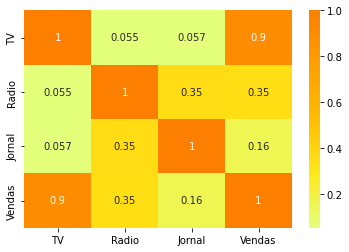

In [8]:
# Análise Exploratória
display(tabela.corr())

import seaborn as sns
import matplotlib.pyplot as plt

# sns.heatmap(tabela.corr([["TV", "Vendas"]]), cmap="Wistia", annot=True)
sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)

plt.show()

In [16]:
y = tabela["Vendas"]

x = tabela[["TV", "Radio", "Jornal"]]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1) 

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treino
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [19]:
from sklearn.metrics import r2_score

# previsões
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)

# comparar a previsão
print(r2_score(y_teste, previsao_arvoredecisao))
print(r2_score(y_teste, previsao_regressaolinear))



0.9638623107393848
0.9071151423684273


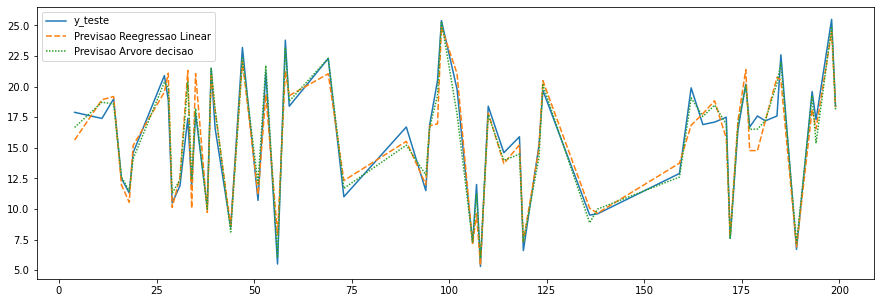

In [20]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsao Reegressao Linear"] = previsao_regressaolinear
tabela_auxiliar["Previsao Arvore decisao"] = previsao_arvoredecisao

plt.figure(figsize=(15, 5))
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [21]:
tabela_nova = pd.read_csv("novos.csv")
display(tabela_nova)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [22]:
# Nova previsão
previsao = modelo_arvoredecisao.predict(tabela_nova)
print(previsao)

[ 7.798  8.755 19.786]
